# Prova Data Science N1

## <font color='red'>Importante: a prova é individual.</font>

**Instruções:**

1. Faça download deste notebook e carregue o mesmo na sua conta do Google Colab.
2. Responda às questões propostas.
3. Crie um repositório para o notebook, "commite" o notebook neste repositório.
4. Na tarefa de avaliação do Teams, envie o link do repositório. Arquivos enviados diretamente no Teams não serão considerados.
5. Commits no repositório após a data de entrega (combinada em sala de aula) serão desconsiderados.

# Objeto da avaliação

Você irá fazer o download do arquivo de dados matches.csv do [repositório do Github](https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv)

Todas as questões/atividades serão realizadas com base neste arquivo. É importante que você responda aos questionamentos propostos o mais completo possível, com a maior quantidade de detalhes que você conseguir incluir.

Não se contente com o básico, seja criativo nas respostas, indo além do tradicional.

## **Importante!!**

Antes de começar a responder, abra o arquivo de dados e entenda o dataset. Não será fornecido um dicionário de dados, é sua tarefa analisar o dataset e "inferir" o que são as colunas e a sua organização.

## Instalação de bibliotecas necessárias

Instale neste local todas as bibliotecas necessárias para resolução da avaliação.

In [72]:
# Importar bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import plotly.express as px
import seaborn as sns
# URL do CSV
url = "https://raw.githubusercontent.com/mdietterle/repositorio_dados/main/matches.csv"

# Carregar o CSV diretamente da URL
df = pd.read_csv(url)

## Estatísticas básicas do dataset


Carregue o arquivo de dados no notebook e exiba as características básicas do arquivo (shape, tipo de dados, dados ausentes, estatísticas básicas dos dados, etc)

In [ ]:
# Exibir as primeiras 5 linhas do DataFrame para ver como os dados estão
print("Primeiras 5 linhas do dataset:")
print(df.head())

# Exibir o shape (número de linhas e colunas)
print("\nShape do dataset (linhas, colunas):")
print(df.shape)

# Exibir tipos de dados de cada coluna
print("\nTipos de dados de cada coluna:")
print(df.dtypes)

# Verificar se há dados ausentes e quantos
print("\nDados ausentes em cada coluna:")
print(df.isnull().sum())

# Exibir estatísticas básicas das colunas numéricas
print("\nEstatísticas básicas das colunas numéricas:")
print(df.describe())

# Exibir estatísticas básicas das colunas categóricas
print("\nEstatísticas básicas das colunas categóricas:")
print(df.describe(include=['object']))


## Dia da semana com placares mais altos

Crie um gráfico que responda em qual dia da semana os placares foram mais altos. O conceito de "placar mais alto" é a soma dos gols feitos no jogo.

Como a quantidade de jogos não é a mesma em todos os dias da semana (finais de semana tendem a ter mais jogos que em dias da semana - o que resultaria em placares mais altos nestes dias), você deverá encontrar uma forma de equalizar esta diferença na quantidade de jogos.

A resposta deverá ser um gráfico que demonstre claramente o comparativo dos dias.

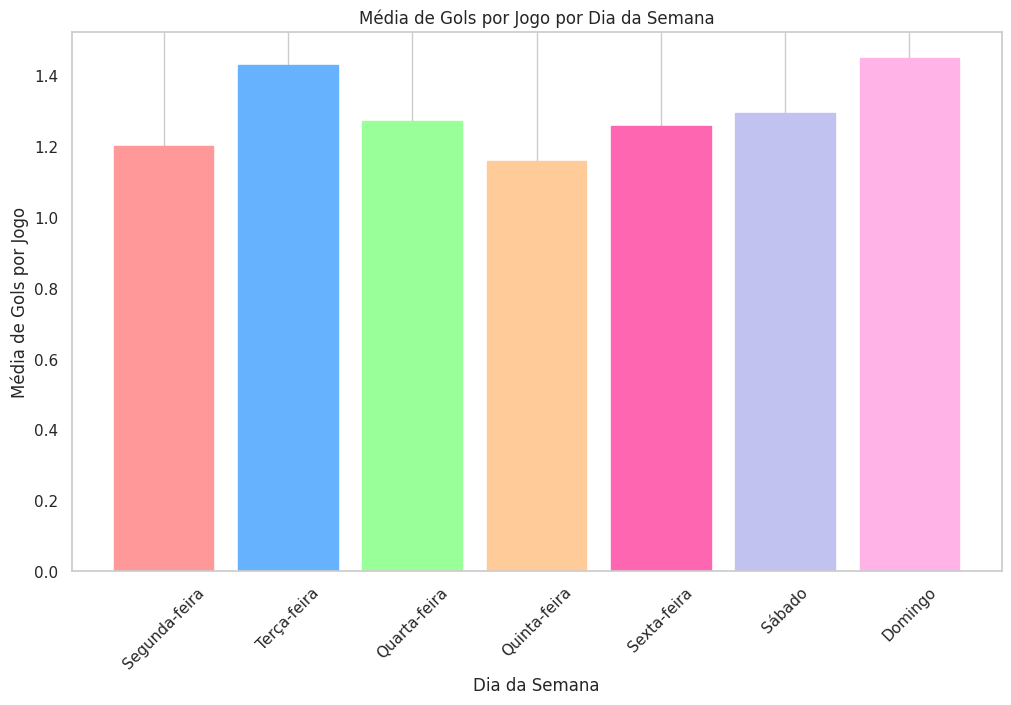

In [25]:
# Adicionar coluna com o dia da semana em inglês
df['day_of_week'] = pd.to_datetime(df['date']).dt.day_name()

# Mapeamento dos dias da semana para português
day_translation = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

# Aplicar a tradução
df['day_of_week_pt'] = df['day_of_week'].map(day_translation)

# Calcular a soma dos gols feitos e o número de jogos por dia da semana
daily_stats = df.groupby('day_of_week_pt').agg({
    'gf': 'sum',  # Soma dos gols feitos
    'team': 'count'  # Número de jogos
}).rename(columns={'gf': 'total_goals', 'team': 'num_matches'})

# Calcular a média de gols por jogo
daily_stats['average_goals'] = daily_stats['total_goals'] / daily_stats['num_matches']

# Ordenar os dias da semana
ordered_days_pt = ['Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado', 'Domingo']
daily_stats = daily_stats.reindex(ordered_days_pt)

# Cores diferentes para cada dia da semana
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF66B2', '#C2C2F0', '#FFB3E6']

# Plotar o gráfico
plt.figure(figsize=(12, 7))
bars = plt.bar(daily_stats.index, daily_stats['average_goals'], color=colors)
plt.xlabel('Dia da Semana')
plt.ylabel('Média de Gols por Jogo')
plt.title('Média de Gols por Jogo por Dia da Semana')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adicionar legenda com as cores dos dias da semana
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Exibir o gráfico
plt.show()


## Capitães

Quantos capitães diferentes cada equipe teve durante a temporada?

Responda em forma de um gráfico comparativo, apresentando os dados o mais claramente possível.

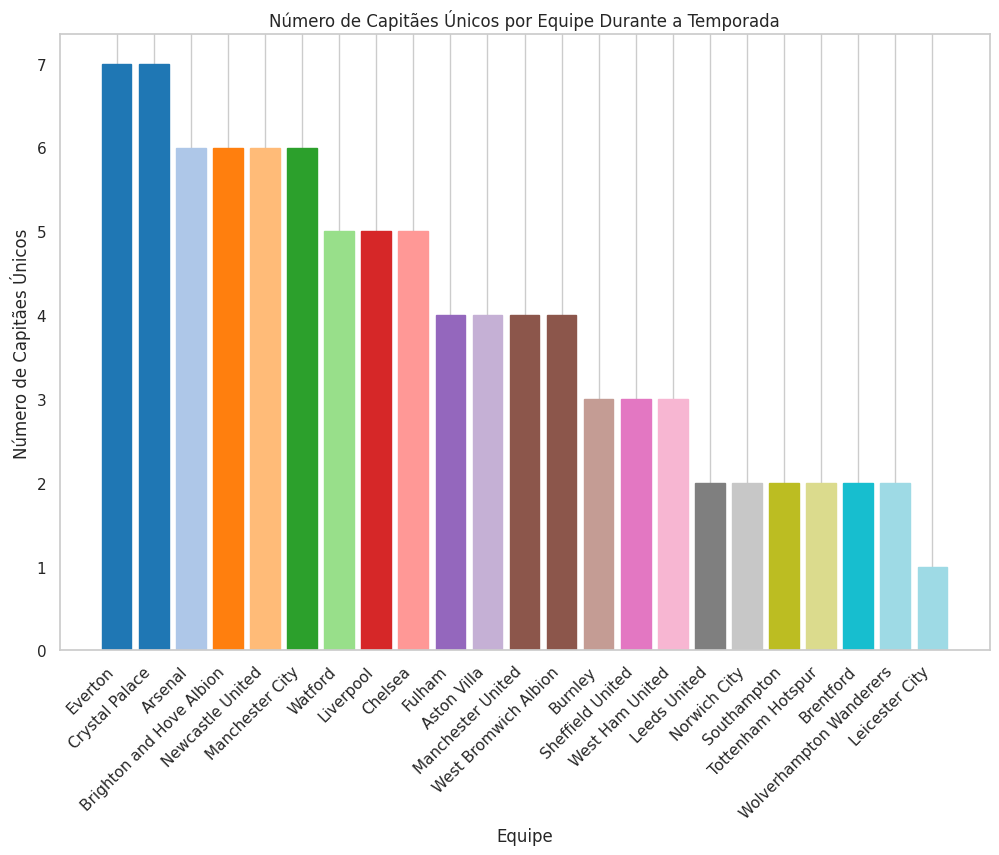

In [73]:
# Contar o número de capitães únicos para cada equipe
captain_counts = df.groupby('team')['captain'].nunique().reset_index()

# Renomear as colunas para clareza
captain_counts.columns = ['Equipe', 'Número de Capitães Únicos']

# Ordenar por número de capitães únicos
captain_counts = captain_counts.sort_values(by='Número de Capitães Únicos', ascending=False)

# Gerar uma lista de cores distintas
num_teams = len(captain_counts)
colors = plt.cm.tab20(np.linspace(0, 1, num_teams))

# Plotar o gráfico comparativo
plt.figure(figsize=(12, 8))
bars = plt.bar(captain_counts['Equipe'], captain_counts['Número de Capitães Únicos'], color=colors)
plt.xlabel('Equipe')
plt.ylabel('Número de Capitães Únicos')
plt.title('Número de Capitães Únicos por Equipe Durante a Temporada')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

# Adicionar legenda com as cores das equipes
for bar, color in zip(bars, colors):
    bar.set_color(color)

# Exibir o gráfico
plt.show()


## Formação Tática

Qual a formação tática mais comum para cada equipe de acordo com o resultado obtido (Ex: para vitórias, a formação mais comum é X, para empates Y e para Z em derrotas).

**Importante** responda de forma que seja possível fazer comparativos entre equipes.

Responda com um gráfico.

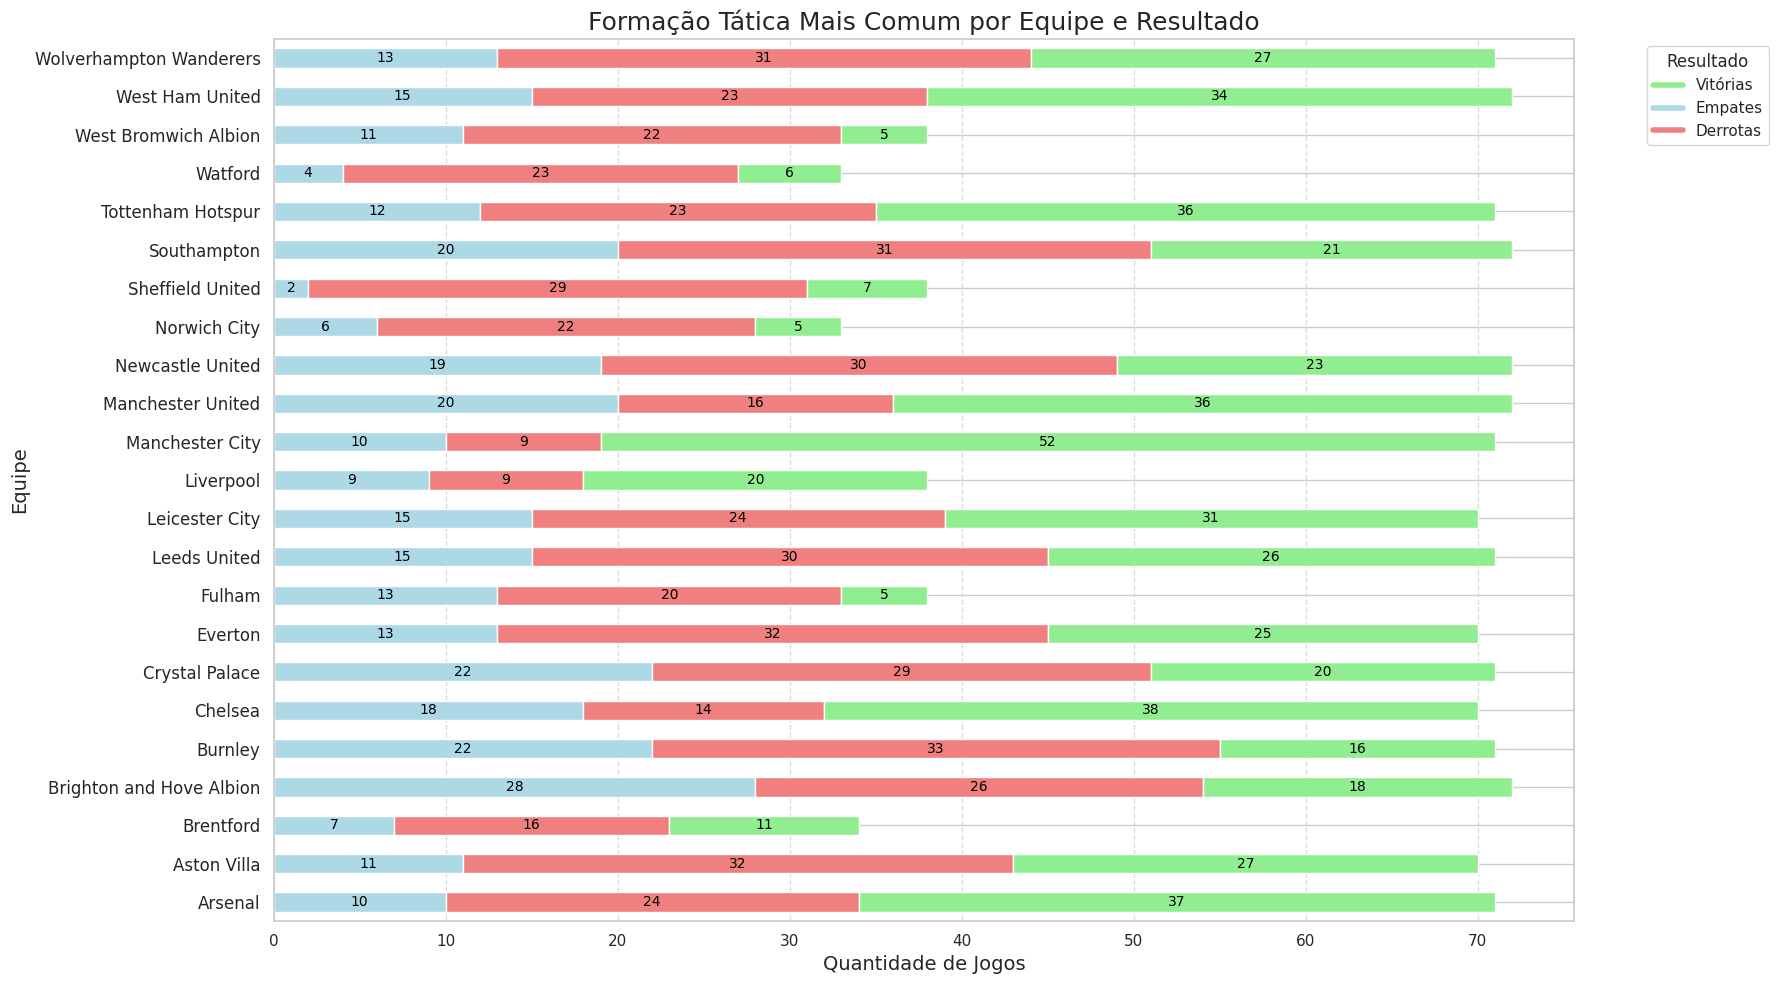

In [49]:
# Processar os dados para encontrar a formação mais comum por equipe e resultado
most_common_formation = df.groupby(['team', 'result'])['formation'].agg(lambda x: x.mode().iloc[0]).reset_index()

# Contar a quantidade de jogos por equipe e resultado
count_by_team_result = df.groupby(['team', 'result']).size().reset_index(name='count')

# Merge para obter as formações e contagens em um único DataFrame
merged = pd.merge(most_common_formation, count_by_team_result, on=['team', 'result'])

# Criar uma tabela de comparação com formatação adequada
comparison_table = merged.pivot(index='team', columns='result', values='count').fillna(0)

# Cores para cada resultado (cores mais claras)
colors = {'W': '#90ee90', 'D': '#add8e6', 'L': '#f08080'}

# Configurar o gráfico
fig, ax = plt.subplots(figsize=(16, 10))

# Plotar o gráfico de barras empilhadas
comparison_table.plot(kind='barh', stacked=True, color=[colors[result] for result in comparison_table.columns], ax=ax)

# Adicionar rótulos de contagem nas barras
for i, (team, row) in enumerate(comparison_table.iterrows()):
    cumulative = 0
    for result in comparison_table.columns:
        count = row[result]
        if count > 0:
            ax.text(cumulative + count / 2, i, f'{int(count)}', ha='center', va='center', fontsize=10, color='black')
            cumulative += count

# Títulos e labels
plt.title('Formação Tática Mais Comum por Equipe e Resultado', fontsize=18)
plt.xlabel('Quantidade de Jogos', fontsize=14)
plt.ylabel('Equipe', fontsize=14)

# Ajustar rotação e alinhamento dos nomes das equipes
plt.yticks(fontsize=12)

# Adicionar uma grade para melhor leitura
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Adicionar a legenda explicativa
legend_labels = {'W': 'Vitórias', 'D': 'Empates', 'L': 'Derrotas'}
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors.values()]
ax.legend(handles, [legend_labels[result] for result in legend_labels.keys()], title='Resultado', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


## Posse de bola

Qual a média de posse de bola da equipe mandante quando ela perdeu o jogo?

Responda em forma de gráfico para poder comparar entre todas as equipes.

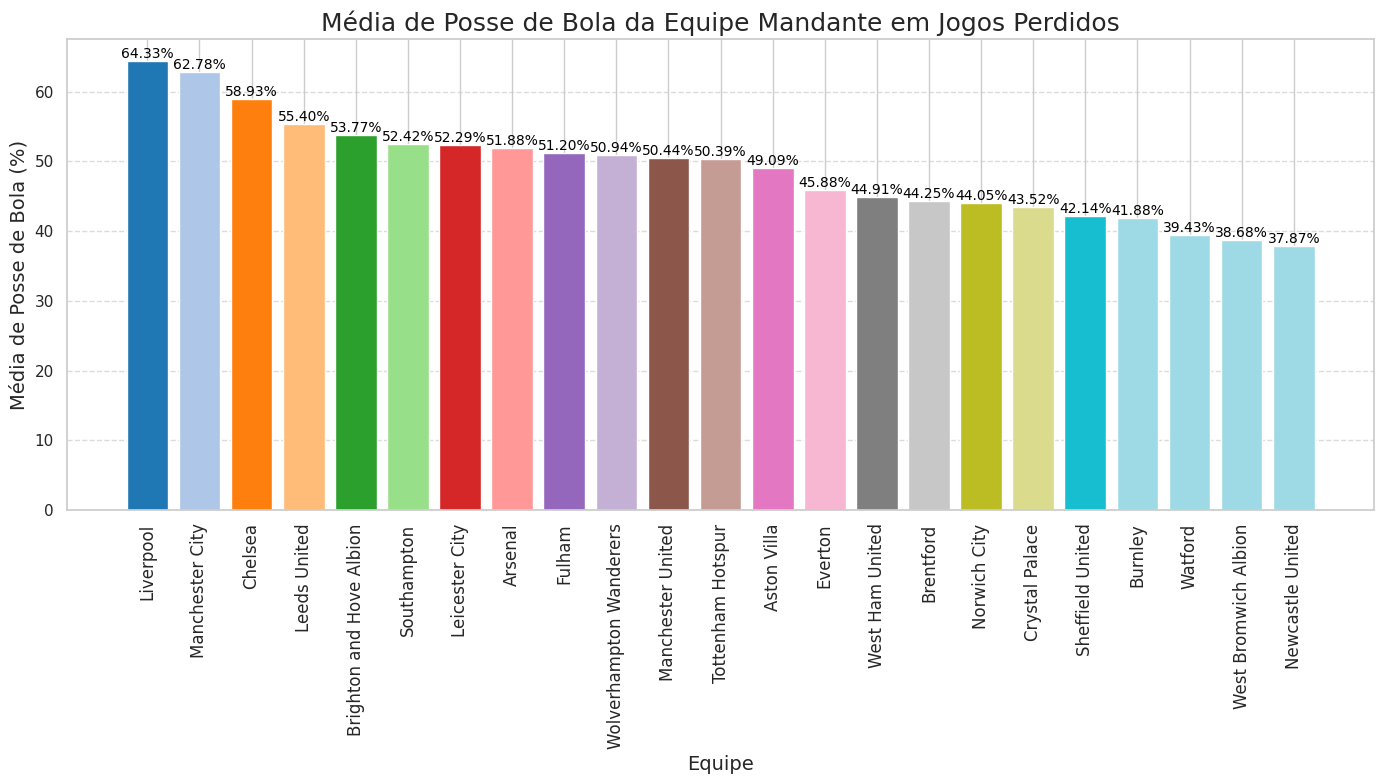

In [51]:
# Filtrar apenas os jogos em que a equipe mandante perdeu
lost_games = df[df['result'] == 'L']

# Calcular a média de posse de bola para cada equipe mandante nos jogos que perdeu
mean_possession_lost = lost_games.groupby('team')['poss'].mean().reset_index()

# Ordenar os dados pela posse de bola em ordem decrescente
mean_possession_lost = mean_possession_lost.sort_values(by='poss', ascending=False)

# Configurar o gráfico
fig, ax = plt.subplots(figsize=(14, 8))

# Criar uma lista de cores diferentes para cada equipe
colors = plt.cm.tab20(range(len(mean_possession_lost['team'])))

# Plotar o gráfico de barras verticais
bars = ax.bar(mean_possession_lost['team'], mean_possession_lost['poss'], color=colors)

# Adicionar rótulos de contagem no topo de cada barra
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}%', va='bottom', ha='center', fontsize=10, color='black')

# Adicionar títulos e labels
plt.title('Média de Posse de Bola da Equipe Mandante em Jogos Perdidos', fontsize=18)
plt.xlabel('Equipe', fontsize=14)
plt.ylabel('Média de Posse de Bola (%)', fontsize=14)

# Ajustar a rotação dos rótulos do eixo x para melhor leitura
plt.xticks(rotation=90, fontsize=12)

# Adicionar uma grade para melhor leitura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar layout para evitar sobreposição
plt.tight_layout()

plt.show()


## Classificação

Qual a classificação final do campeonato?

Responda em forma de tabela, ordenada do primeiro colocado ao último.
Você deverá apresentar o brasão do time (pode ser obtido online [aqui](https://logodetimes.com/premier-league/), mas automatize a busca, não salve o logo localmente), o nome, a quantidade de pontos e a posição final no campeonato.

**OBS** Vitória vale 3 pontos, empates 1 ponto e derrota 0 pontos.

In [74]:
# Calcular os pontos
def calculate_points(result):
    if result == 'W':
        return 3
    elif result == 'D':
        return 1
    return 0

df['points'] = df['result'].apply(calculate_points)

# Somar pontos e contar o número de jogos para cada equipe
points_table = df.groupby('team')['points'].sum().reset_index()
points_table = points_table.sort_values(by='points', ascending=False).reset_index(drop=True)

# Adicionar a posição
points_table['position'] = points_table.index + 1

# Mapear os brasões dos times
team_logos = {
    'Manchester City': 'https://logodetimes.com/wp-content/uploads/manchester-city-football-club.png',
    'Liverpool': 'https://logodetimes.com/wp-content/uploads/liverpool-football-club.png',
    'Arsenal': 'https://logodetimes.com/wp-content/uploads/arsenal-football-club.png',
    'Chelsea': 'https://logodetimes.com/wp-content/uploads/chelsea-football-club.png',
    'Tottenham': 'https://logodetimes.com/wp-content/uploads/tottenham-hotspur-football-club.png',
    'Manchester United': 'https://logodetimes.com/wp-content/uploads/manchester-united-football-club.png',
    'West Ham': 'https://logodetimes.com/wp-content/uploads/west-ham-united-football-club.png',
    'Wolves': 'https://logodetimes.com/wp-content/uploads/wolverhampton-wanderers-football-club.png',
    'Everton': 'https://logodetimes.com/wp-content/uploads/Everton-club.png',
    'Leicester': 'https://logodetimes.com/wp-content/uploads/leicester-city-football-club.png',
    'Newcastle United': 'https://logodetimes.com/wp-content/uploads/Newcastle-United-club.png',
    'Aston Villa': 'https://logodetimes.com/wp-content/uploads/Aston-Villa-club.png',
    'Sheffield United': 'https://logodetimes.com/wp-content/uploads/Sheffield-United-club.png',
    'Brighton': 'https://logodetimes.com/wp-content/uploads/Brighton-club.png',
    'Burnley': 'https://logodetimes.com/wp-content/uploads/Burnley-club.png',
    'Fulham': 'https://logodetimes.com/wp-content/uploads/Fulham-club.png',
    'Crystal Palace': 'https://logodetimes.com/wp-content/uploads/Crystal-Palace-club.png',
    'Leeds United': 'https://logodetimes.com/wp-content/uploads/Leeds-United-club.png',
    'Nottingham Forest': 'https://logodetimes.com/wp-content/uploads/Nottingham-Forest-club.png',
    'Brentford': 'https://logodetimes.com/wp-content/uploads/Brentford-club.png'
}

# Adicionar coluna de brasão
points_table['logo'] = points_table['team'].map(team_logos)

# Criar a tabela HTML
html_table = points_table.to_html(escape=False, formatters={'logo': lambda x: f'<img src="{x}" width="30" height="30">'})
display(HTML(html_table))


,team,points,position,logo
0,Manchester City,166,1,
1,Chelsea,132,2,
2,Manchester United,128,3,
3,Arsenal,121,4,
4,Tottenham Hotspur,120,5,NaN
5,West Ham United,117,6,NaN
6,Leicester City,108,7,NaN
7,Wolverhampton Wanderers,94,8,NaN
8,Leeds United,93,9,
9,Aston Villa,92,10,


## Público

Crie uma visualização que apresente o público total de cada equipe, e também um detalhamento por jogos.

Apresentar os dados usando a técnica "DrillDown" será considerado um "plus". A visualização DrillDown permite que gráficos sejam detalhados com cliques em itens do gráfico.

Um exemplo com tabelas pode ser encontrado [aqui](https://dash.plotly.com/dash-ag-grid/enterprise-master-detail).

Um exemplo usando gráficos pode ser encontrado [aqui](https://community.plotly.com/t/show-and-tell-drill-down-functionality-in-dash-using-callback-context/54403?u=atharvakatre)

In [75]:
team_attendance = df.groupby('team')['attendance'].sum().reset_index().sort_values(by='attendance', ascending=True)

def format_number(x):
    if x >= 1_000_000:
        return f'{x / 1_000_000:.1f}M'
    elif x >= 1_000:
        return f'{x / 1_000:.1f}K'
    else:
        return str(x)

team_attendance['formatted_attendance'] = team_attendance['attendance'].apply(format_number)

fig = px.bar(team_attendance,
             x='team',
             y='attendance',
             color='team',
             title='Público Total e Detalhamento por Jogos',
             labels={'attendance': 'Público', 'team': 'Equipe'},
             height=800,
             width=1000,
             text='formatted_attendance')

fig.update_traces(marker=dict(color='royalblue'),
                  selector=dict(mode='markers+text'))

fig.update_layout(clickmode='event+select')

fig.update_traces(
    hovertemplate='Equipe: %{x}<br>Público Total: %{y:,}<extra></extra>'
)

fig.update_layout(
    xaxis_title='Equipe',
    yaxis_title='Público Total',
    xaxis_tickangle=-45,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    title_font_size=16,
    margin=dict(l=200, r=50, t=50, b=100)
)

fig.show()